In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
##nltk.download('all')

Como siempre lo primero es declarar las bibliotecas que usaremos, pero muchos de los modulos que tenia que usar no estaban instalados, así que instale todo. Si el In les parece raro, es porque solo lo ejecute una vez, pero queria dejarlo allí como una nota. 

In [3]:
with open('Warhammer 40.txt', 'r') as file:
    contenido = file.read()

print(contenido)

Warhammer 40,000: 10th Edition has now truly arrived. The rules and launch box have been around for a couple of weeks and the new starter sets are nearly here. (I particularly recommend the Ultimate Starter, it’s the best game-in-a-box product Games Workshop has made in years.) We’ve already talked about the Leviathan launch box, but that’s just a collection of very lovely miniatures and a fancy big-book version of the rules. Ultimately, it’s those rules - which are available in assorted other formats, including free PDF and app versions - that are relevant to the question we’re looking at today: is the new 10th edition of Warhammer 40k any good?
10E isn’t a radical departure from the previous edition. This is still Warhammer as we know it. You and your opponent take turns moving, shooting, charging and fighting with your armies, rolling big handfuls of d6 in the process. GW’s mantra for this edition is “simplified, but not simple”, and that has manifested as a streamlining of many ele

Lo que vamos a hacer es analizar esta reseña de la decima edición del juego de mesa de Warhammer 40k, donde se analizan las reglas, se comparan con la edición anterior y otras cosas. Vamos a analizar este texto usando un programa de análisis de sentimiento.

In [4]:
tokens = nltk.word_tokenize(contenido)

In [5]:
Frec = nltk.FreqDist(token for token in tokens)

Primero tokenizamos el texto, que basicamente separa cada palabra del texto, esto es útil para poder estudiar cada palabra por separado. Luego usamos la frecuencia para facilitarnos el estudiar estas palabras.

In [6]:
print("Palabras en el texto:",(len(tokens)))
print(f"Palabras únicas: {len(Frec)}")

Palabras en el texto: 2090
Palabras únicas: 683


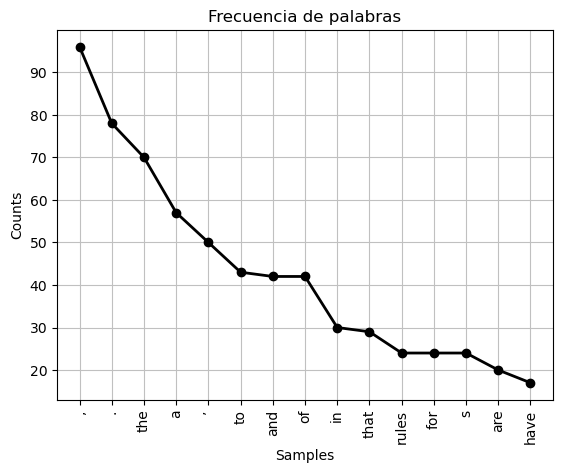

<AxesSubplot:title={'center':'Frecuencia de palabras'}, xlabel='Samples', ylabel='Counts'>

In [7]:
Frec.plot(15, title='Frecuencia de palabras', color = 'black', marker = 'o')

Vemos que muchos tokens son meros puntos de puntuación que no aportan absolutamente nada al momento de que la maquina analize el texto. Así que vamos a eliminarlos junto a cualquier número que en cuentre, por las mismas razónes.

In [26]:
token_alpha = [token.lower() for token in tokens if token.isalpha()]

In [29]:
token_alpha

['warhammer',
 'edition',
 'has',
 'now',
 'truly',
 'arrived',
 'the',
 'rules',
 'and',
 'launch',
 'box',
 'have',
 'been',
 'around',
 'for',
 'a',
 'couple',
 'of',
 'weeks',
 'and',
 'the',
 'new',
 'starter',
 'sets',
 'are',
 'nearly',
 'here',
 'i',
 'particularly',
 'recommend',
 'the',
 'ultimate',
 'starter',
 'it',
 's',
 'the',
 'best',
 'product',
 'games',
 'workshop',
 'has',
 'made',
 'in',
 'years',
 'we',
 've',
 'already',
 'talked',
 'about',
 'the',
 'leviathan',
 'launch',
 'box',
 'but',
 'that',
 's',
 'just',
 'a',
 'collection',
 'of',
 'very',
 'lovely',
 'miniatures',
 'and',
 'a',
 'fancy',
 'version',
 'of',
 'the',
 'rules',
 'ultimately',
 'it',
 's',
 'those',
 'rules',
 'which',
 'are',
 'available',
 'in',
 'assorted',
 'other',
 'formats',
 'including',
 'free',
 'pdf',
 'and',
 'app',
 'versions',
 'that',
 'are',
 'relevant',
 'to',
 'the',
 'question',
 'we',
 're',
 'looking',
 'at',
 'today',
 'is',
 'the',
 'new',
 'edition',
 'of',
 'warhamm

In [30]:
Freq_alpha = nltk.FreqDist(token_alpha)

Tambien aprobechamos para quitar las mayúsculas que causan probelmas al momento de hacer el StopWord.

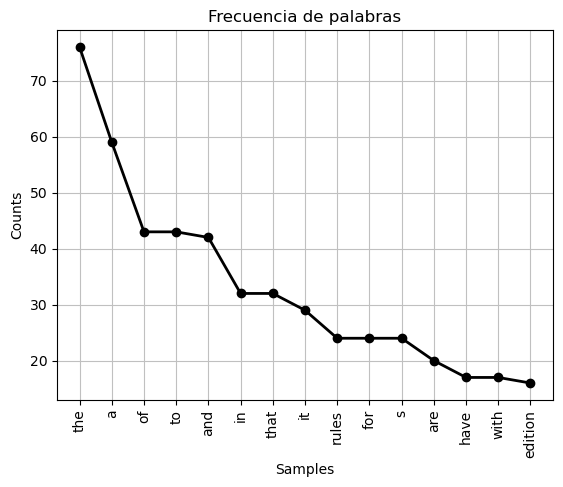

<AxesSubplot:title={'center':'Frecuencia de palabras'}, xlabel='Samples', ylabel='Counts'>

In [31]:
Freq_alpha.plot(15, title='Frecuencia de palabras', color = 'black', marker = 'o')

In [32]:
print("Palabras en el texto:",(len(token_alpha)))
print(f"Palabras únicas: {len(Freq_alpha)}")

Palabras en el texto: 1783
Palabras únicas: 609


Ahora usaremos StopWord.
### ¿Para qué sirve Stop Word?
Encontramos que la mayoria de las palabras son 'the', 'a', u otras palabras que le resultan irrelevantes a la maquina al momento de estudiar el texto, ya que resultan muy comúnes o carecen de significados.

In [33]:
filtered_tokens = [token for token in token_alpha if token not in stopwords.words('english')]

In [34]:
filtered_tokens

['warhammer',
 'edition',
 'truly',
 'arrived',
 'rules',
 'launch',
 'box',
 'around',
 'couple',
 'weeks',
 'new',
 'starter',
 'sets',
 'nearly',
 'particularly',
 'recommend',
 'ultimate',
 'starter',
 'best',
 'product',
 'games',
 'workshop',
 'made',
 'years',
 'already',
 'talked',
 'leviathan',
 'launch',
 'box',
 'collection',
 'lovely',
 'miniatures',
 'fancy',
 'version',
 'rules',
 'ultimately',
 'rules',
 'available',
 'assorted',
 'formats',
 'including',
 'free',
 'pdf',
 'app',
 'versions',
 'relevant',
 'question',
 'looking',
 'today',
 'new',
 'edition',
 'warhammer',
 'good',
 'radical',
 'departure',
 'previous',
 'edition',
 'still',
 'warhammer',
 'know',
 'opponent',
 'take',
 'turns',
 'moving',
 'shooting',
 'charging',
 'fighting',
 'armies',
 'rolling',
 'big',
 'handfuls',
 'process',
 'gw',
 'mantra',
 'edition',
 'simplified',
 'simple',
 'manifested',
 'streamlining',
 'many',
 'elements',
 'making',
 'much',
 'easier',
 'game',
 'comprehend',
 'smoothe

In [36]:
Frec_fil = nltk.FreqDist(filtered_tokens)

In [37]:
print("Palabras en el texto:",(len(words)))
print(f"Palabras únicas: {len(Frec_fil)}")

Palabras en el texto: 897
Palabras únicas: 507


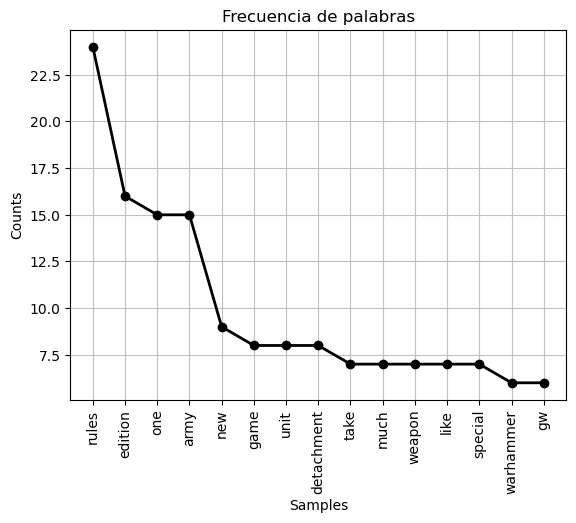

<AxesSubplot:title={'center':'Frecuencia de palabras'}, xlabel='Samples', ylabel='Counts'>

In [38]:
Frec_fil.plot(15, title='Frecuencia de palabras', color = 'black', marker = 'o')

Ahora notamos que el texto es dominado por palabras como 'rules', 'edition', 'army', entre otras; lo que tiene sentido considerando que el texto esta evaluando y juzgando la nuevas reglas de un juego de mesa de ejercitos en miniatura.

In [39]:
ps = PorterStemmer()

stem_tokens = [ps.stem(token) for token in filtered_tokens]

Stemming solo reduce las palabras a su estado más basico, esto sirve para mejorar el rendimiento del modelo y facilitarle el analisis y comprención del texto.

In [40]:
processed_text = ' '.join(stem_tokens)

In [41]:
processed_text

'warhamm edit truli arriv rule launch box around coupl week new starter set nearli particularli recommend ultim starter best product game workshop made year alreadi talk leviathan launch box collect love miniatur fanci version rule ultim rule avail assort format includ free pdf app version relev question look today new edit warhamm good radic departur previou edit still warhamm know oppon take turn move shoot charg fight armi roll big hand process gw mantra edit simplifi simpl manifest streamlin mani element make much easier game comprehend smoother play experi take look datasheet favourit unit thing immedi jump brand new object control stat use guess determin control contest object leadership present number roll rather bring line stat big chang stat attack weapon skill ballist skill strength move main stat line weapon profil much like age sigmar may seem like huge deal outsid present great illustr edit cut unnecessari complex weapon profil longer individu special rule attach chanc hit

Ahora unimos el texto, ya que si no lo hacemos el modelo no funcionara.

In [42]:
analyzer = SentimentIntensityAnalyzer()

In [43]:
scores = analyzer.polarity_scores(processed_text)

In [44]:
scores

{'neg': 0.086, 'neu': 0.712, 'pos': 0.202, 'compound': 0.999}

Vemos como la mayoria de la puntuación cae en neutral, nuevamente, esto es normal ya que la mayoria de las palabras utilizadas son palabras necesarias para hablar del juego, pero que carecen de cualquier significado fuera de ese contexto.

Vemos que el compund (-1 = negativo, 0 = neutro, 1 = positivo) es de casi 1, casi perfecto, lo que tiene sentido considerando que la mayoria de los valores cayeron en un valor positivo. Parece que el articulo habla bastante bien de la nueva Edición de Warhammer 40K.

# Conclusión

nltk es una libreria que nos sirve para analizar la opinión de las personas sobre ciertos temas, y pero es necesario hacerles un preprocesado para poder ayudar a la maquina a entender lo que esta viendo.